<a href="https://colab.research.google.com/github/kaisardauletbek/NeuralNetwork/blob/main/HandwritingClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST("./", download=True, train=True)
MNIST_test = torchvision.datasets.MNIST("./", download=True, train=False)

In [ ]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [ ]:
X_train = X_train.float()
X_test = X_test.float()

In [ ]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [ ]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

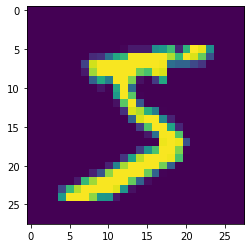

tensor(5)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [ ]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [ ]:
class MNISTNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(MNISTNet, self).__init__()
    self.fc1 = torch.nn.Linear(28*28, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

mnist_net = MNISTNet(100)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
!nvidia-smi

Wed May 26 09:50:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    26W /  70W |   1108MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
#list(mnist_net.parameters())

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr = 0.001)

In [ ]:
x=torch.zeros([6000, 28, 28], dtype=torch.int32)
x.reshape(-1,1,1).shape

torch.Size([4704000, 1, 1])

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
  order = np.random.permutation(len(X_train))

  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]
    X_batch = X_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes].to(device)

    predictions = mnist_net.forward(X_batch)

    loss_value = loss(predictions, y_batch)
    loss_value.backward()

    optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.1151, device='cuda:0')
tensor(0.2070, device='cuda:0')
tensor(0.2837, device='cuda:0')
tensor(0.3348, device='cuda:0')
tensor(0.3709, device='cuda:0')
tensor(0.4204, device='cuda:0')
tensor(0.4770, device='cuda:0')
tensor(0.5222, device='cuda:0')
tensor(0.5501, device='cuda:0')
tensor(0.5651, device='cuda:0')
tensor(0.5818, device='cuda:0')
tensor(0.5872, device='cuda:0')
tensor(0.5953, device='cuda:0')
tensor(0.6064, device='cuda:0')
tensor(0.6169, device='cuda:0')
tensor(0.6295, device='cuda:0')
tensor(0.6463, device='cuda:0')
tensor(0.6536, device='cuda:0')
tensor(0.6606, device='cuda:0')
tensor(0.6723, device='cuda:0')
tensor(0.6858, device='cuda:0')
tensor(0.6947, device='cuda:0')
tensor(0.7041, device='cuda:0')
tensor(0.7173, device='cuda:0')
tensor(0.7272, device='cuda:0')
tensor(0.7349, device='cuda:0')
tensor(0.7418, device='cuda:0')
tensor(0.7448, device='cuda:0')
tensor(0.7487, device='cuda:0')
tensor(0.7522, device='cuda:0')
tensor(0.7559, device='cuda:0')
tensor(0

RuntimeError: ignored

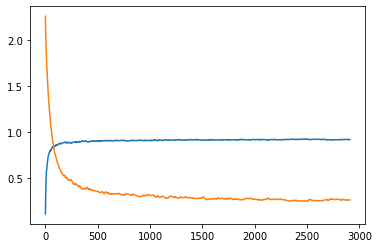

In [ ]:
plt.plot(test_accuracy_history)
plt.plot(test_loss_history);

TypeError: ignored

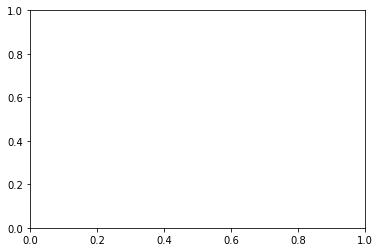

In [ ]:
plt.plot(X_test)

In [65]:
import torch
from torch import nn
conv = nn.Conv2d(1,1,kernel_size=3, padding=1, stride=2, bias=False)
X = torch.FloatTensor([[[
    [4, 2, -1],
    [-6, 0, 5],
    [3, 2, 2]]]])
conv.weight.data = torch.FloatTensor([[[
    [0, 1, 2],
    [1, -1, 0],
    [1, 0, -2]]]])
res = conv(X).data[0,0]
print(res)

tensor([[-4.,  3.],
        [-9.,  5.]])
